In [54]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
import numpy as np
import matplotlib.pyplot as plt

### 예제 데이터 생성
#### 1. make_classification은 scikit-learn 패키지로 가상의 분류모형 데이터를 생성하는 함수
- n_samples : 표본 데이터 수 (default = 100)
- n_features : 독립변수의 수 (default = 20)
- n_informative : 독립 변수 中 종속 변수와 상관 관계가 있는 성분의 수 (default = 2)
- n_redundant : 독립 변수 중, 다른 독립 변수의 선형 결합으로 만들어지는 성분의 수 (default = 2)
- n_classes : 종속 변수의 Class 수 (default = 2)
- n_clusters_per_class : 클래스 당 클러스터의 수 (default = 2)
- weights : 각 클래스를 어떠한 비율로 할당할 것인가? (default = None)
- flip_y : 클래스가 임의로 교환되는 샘플의 일부, label에 노이즈를 생성하여 분류를 어렵게 만듦 (default = 0.01) 

#### 2. 가상의 imbalanced class를 갖는 data set을 생성

In [42]:
X, y = make_classification(n_samples = 10000, n_features = 2, n_clusters_per_class = 1, 
                           n_redundant = 0, n_classes = 2, weights = [0.98,0.02], random_state = 0)

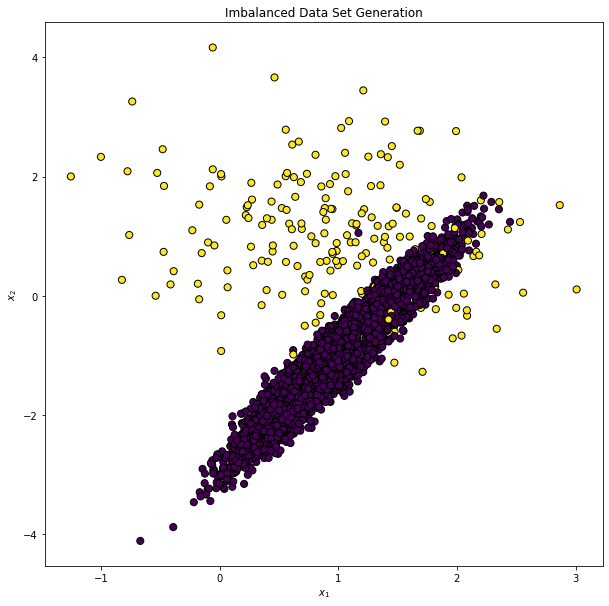

In [49]:
plt.figure(figsize =(10,10))
plt.title("Imbalanced Data Set Generation")
plt.scatter(X[:,0], X[:,1], marker = 'o',s=50, c= y, edgecolor = 'k')
plt.xlabel(r'$x_{1}$')
plt.ylabel(r'$x_{2}$')
plt.show()

### SMOTE 적용

#### SMOTE 함수 옵션

- 가장 중요한 hyperparameter는 K-NN에서 K값을 정하는 것
- 이는 k_neighbors 에 대한 hyperparameter를 정함으로써 결정지을 수 있다.

#### BorderlineSMOTE 함수 옵션

- kind = 'borderline-1' 과 kind = 'borderline-2' 가 존재함
- borderline-1 : Danger Instance와 $S_{min}$에 속하는 값들만 가지고 oversampling 진행
- borderline-2 : 새로운 데이터를 합성할 때, Danger Instance와 주변의 $S_{min}$ 뿐만 아니라 $S_{maj}$ 도 포함하여 거리를 계산한다.

In [62]:
over_sample = SMOTE(sampling_strategy = 'auto', k_neighbors = 3, random_state = 0)
n_X, n_y = over_sample.fit_resample(X,y)

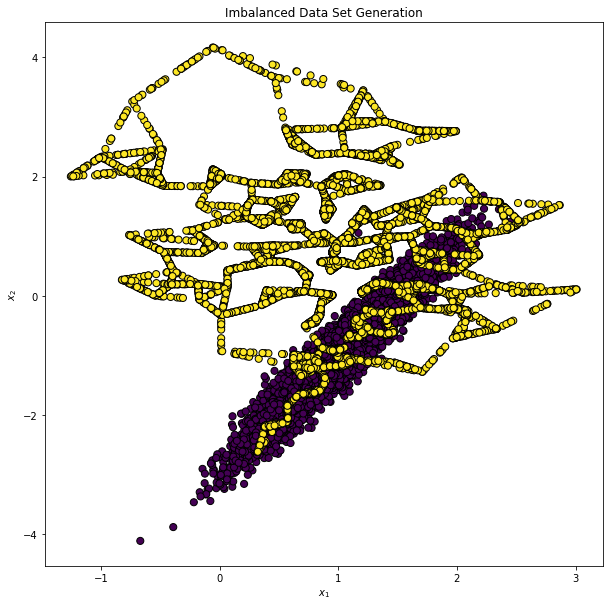

In [63]:
plt.figure(figsize =(10,10))
plt.title("Imbalanced Data Set Generation")
plt.scatter(n_X[:,0], n_X[:,1], marker = 'o',s=50, c= n_y, edgecolor = 'k')
plt.xlabel(r'$x_{1}$')
plt.ylabel(r'$x_{2}$')
plt.show()

In [82]:
over_sample = BorderlineSMOTE(sampling_strategy = 'auto', k_neighbors = 3
                              ,kind='borderline-1', random_state = 0)
bn_X, bn_y = over_sample.fit_resample(X,y)

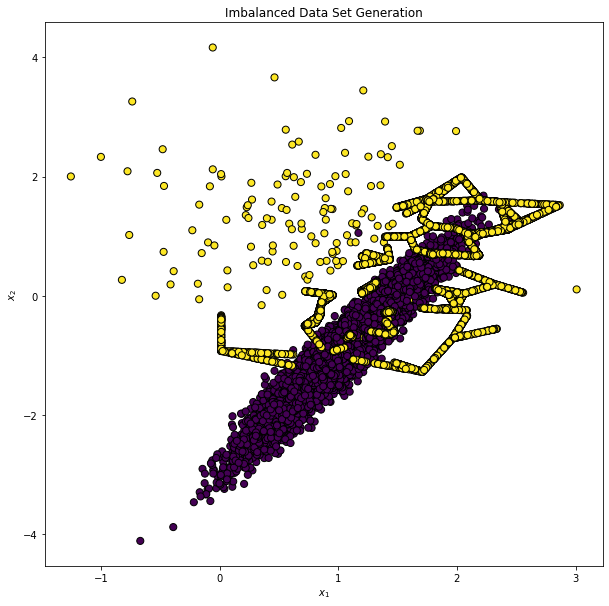

In [83]:
plt.figure(figsize =(10,10))
plt.title("Imbalanced Data Set Generation")
plt.scatter(bn_X[:,0], bn_X[:,1], marker = 'o',s=50, c= bn_y, edgecolor = 'k')
plt.xlabel(r'$x_{1}$')
plt.ylabel(r'$x_{2}$')
plt.show()

#### 1. SMOTE를 통해서 $S_{min}$ 데이터들에 대한 합성 데이터를 생성할 수 있음을 확인 가능
#### 2. BorderlineSMOTE를 통해서는 결정 경계에 중요한 영향을 미치는 데이터만 선별, 합성 데이터를 생성가능함을 확인